# detecting cotton diseases using cnn


In [86]:
import keras

### import librases

In [87]:
from keras.models import Sequential

In [88]:
from keras.layers import Dense

In [89]:
from keras.layers import Conv2D

In [90]:
from keras.layers import MaxPool2D

In [91]:
from keras.layers import Flatten

### init the model

In [92]:
model2=Sequential()

In [93]:
model2.add(Conv2D(filters=8,kernel_size=(3,3),strides=(1,1),input_shape=(128,128,3),activation='relu'))

In [94]:
model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [95]:
model2.add(Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),activation='relu'))
model2.add(Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),activation='relu'))

In [96]:
model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [97]:
model2.add(Flatten())

In [98]:
model2.add(Dense(kernel_initializer="random_uniform",activation="relu",units=150))
model2.add(Dense(kernel_initializer="random_uniform",activation="relu",units=150))
model2.add(Dense(kernel_initializer="random_uniform",activation="relu",units=150))

In [99]:
model2.add(Dense(kernel_initializer="random_uniform",activation="softmax",units=4))

In [100]:
model2.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [101]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 126, 126, 8)       224       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 8)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 61, 61, 16)        1168      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 59, 59, 16)        2320      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 29, 29, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 13456)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 150)              

In [102]:
from keras.preprocessing.image import ImageDataGenerator

In [103]:
train_datagen =ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [104]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [105]:
x_train=train_datagen.flow_from_directory(r'C:\Users\91918\dataset(eye)\dataset_B_Eye_Images\train',target_size=(128,128),color_mode='rgb',class_mode="categorical",batch_size=32)

Found 2860 images belonging to 4 classes.


In [106]:
x_test=test_datagen.flow_from_directory(r'C:\Users\91918\dataset(eye)\dataset_B_Eye_Images\test',target_size=(128,128),color_mode='rgb',class_mode="categorical",batch_size=32)

Found 231 images belonging to 4 classes.


In [78]:
import matplotlib.pyplot as plt

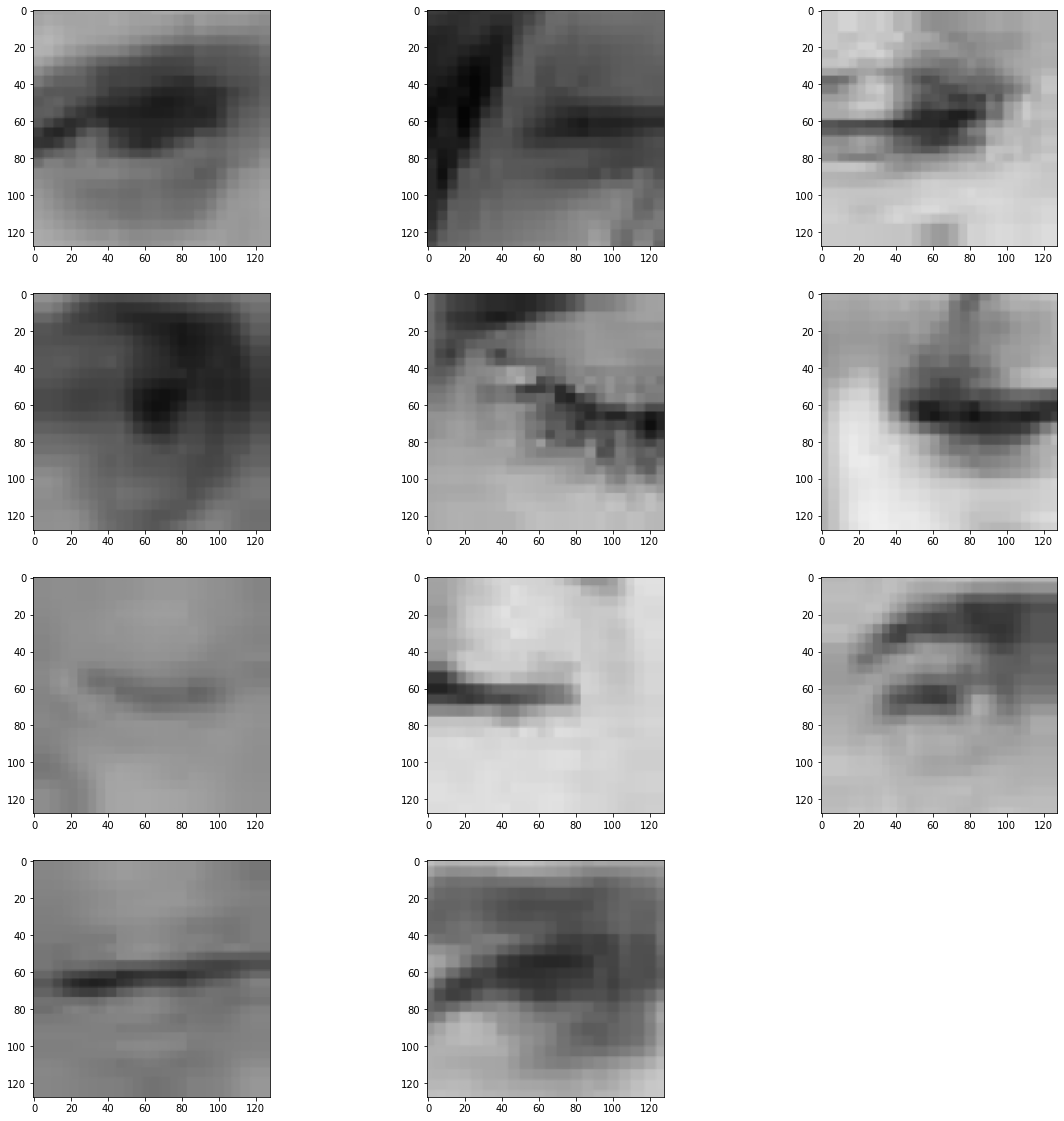

In [79]:
plt.figure(figsize=(20,20))
for i,image in enumerate(x_train,1):
    if(i==12):
        break
    plt.subplot(4,3,i)
    plt.imshow(image[0][10])

In [107]:
x_train.class_indices

{'closedLeftEyes': 0,
 'closedRightEyes': 1,
 'openLeftEyes': 2,
 'openRightEyes': 3}

In [108]:
x_test.class_indices

{'closedLeftEyes': 0,
 'closedRightEyes': 1,
 'openLeftEyes': 2,
 'openRightEyes': 3}

In [109]:
len(x_test)

8

In [112]:
len(x_train)

90

In [113]:
model2.fit_generator(x_train,steps_per_epoch=90,epochs=100,validation_data=x_test,validation_steps=8)

Epoch 1/100
90/90 [==============================] - 51s 564ms/step - loss: 1.3703 - accuracy: 0.2836 - val_loss: 1.4480 - val_accuracy: 0.2381
Epoch 2/100
90/90 [==============================] - 47s 527ms/step - loss: 1.2988 - accuracy: 0.3490 - val_loss: 1.2692 - val_accuracy: 0.4069
Epoch 3/100
90/90 [==============================] - 45s 498ms/step - loss: 1.1196 - accuracy: 0.4510 - val_loss: 1.0962 - val_accuracy: 0.3983
Epoch 4/100
90/90 [==============================] - 44s 491ms/step - loss: 1.0520 - accuracy: 0.4741 - val_loss: 0.9968 - val_accuracy: 0.4848
Epoch 5/100
90/90 [==============================] - 44s 491ms/step - loss: 0.9592 - accuracy: 0.5182 - val_loss: 1.0054 - val_accuracy: 0.4416
Epoch 6/100
90/90 [==============================] - 44s 493ms/step - loss: 0.9089 - accuracy: 0.5346 - val_loss: 0.8952 - val_accuracy: 0.5238
Epoch 7/100
90/90 [==============================] - 47s 521ms/step - loss: 0.8640 - accuracy: 0.5374 - val_loss: 0.9412 - val_accuracy:

KeyboardInterrupt: 

In [1]:
model2.save('eye_detection.h5')

NameError: name 'model2' is not defined

In [3]:
from keras.models import load_model
import cv2

In [4]:
import numpy as np

In [22]:
from keras.models import load_model

import cv2
model2 = load_model('eye_detection.h5')

In [27]:
img =cv2.imread(r'C:\Users\91918\dataset(eye)\dataset_B_Eye_Images\test\closedRightEyes\closed_eye_1336.jpg_face_2_R.jpg',0)
img=cv2.resize(img,(128,128))
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
if (np.max(img)>1):
    img=img/255
        
img=np.array([img])
prediction=model2.predict_classes(img)
label=['closedLeftEyes','closedRightEyes','openLeftEyes','openRightEyes']
prediction=prediction[0]
print(label[prediction])

closedRightEyes


In [19]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

img = cv2.imread(r'C:\Users\91918\dataset(eye)\dataset_B_Eye_Images\test\closedRightEyes\closed_eye_1336.jpg_face_2_R.jpg',0)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [37]:
import cv2

# Loading the cascades
## Loading the Trained Models
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

# Defining a function that will do the detections
def detect(gray, frame):
    #1. Image
    #2.Scaling Factor
    #3. No of neighbouring pixels to be considered to detect
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        print (faces)
        print ("Number of faces detected: " + str(faces.shape[0]))
        #1. Frame we want display the text
        #2. Text we want to display
        #3. Position of the text (x,y)
        #4.Font
        #5.Font Size
        #6.Color
        #7.Thikness
        cv2.putText(frame, "Number of faces detected: " + str(faces.shape[0]), (10, 30),
					cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        roi_color = frame[y:y+h, x:x+w]
        #FaceFileName = "face_" + str(y) + ".jpg"
        #cv2.imwrite(FaceFileName, roi_color)
    return frame

# Doing some Face Recognition with the webcam
video_capture = cv2.VideoCapture(0)
while True:
    data,frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    canvas = detect(gray, frame)
    cv2.imshow('Video', canvas)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()

SystemError: <class 'cv2.CascadeClassifier'> returned a result with an error set

In [38]:
face=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
#eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')


AttributeError: module 'cv2' has no attribute 'data'

In [33]:
cv2.__version__

'4.0.1'

In [36]:
pip install opencv-contrib-python --upgrade

Note: you may need to restart the kernel to use updated packages.
